In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
csopi = pd.read_excel("csoportNOTnorm.xlsx") #Boltok

In [189]:
csopi.head()

,0,1,2,3,4,5,6,7,8,9
0,16600,26900,7400,1300,67800,9000,40300,24000,8000,241800
1,47300,66800,34700,8200,237500,42600,160900,29200,36000,456100
2,31700,6600,2700,0,49400,5500,22100,13400,3300,487300
3,3300,5300,0,0,13800,600,19500,10800,400,34000
4,6000,21200,1600,600,18800,400,21500,9500,2700,168100


# Egész oszlopot hagyunk (jelen esetben ITALOK) és azok értékeit jósolja meg a többiből.

###kód/csoportazonosító 
0: egyébcikkek
1: frissáru
2: hús
3: húskészítmények
4: italok
5: non food termékek
6: papír, vegyáru
7: szolgáltatások
8: zöldség, gyümölcs
9: élelmiszer

In [185]:
csopi.index = range(len(csopi))
csopi.columns = range(10)
csopi.head()

,0,1,2,3,4,5,6,7,8,9
0,16600,26900,7400,1300,67800,9000,40300,24000,8000,241800
1,47300,66800,34700,8200,237500,42600,160900,29200,36000,456100
2,31700,6600,2700,0,49400,5500,22100,13400,3300,487300
3,3300,5300,0,0,13800,600,19500,10800,400,34000
4,6000,21200,1600,600,18800,400,21500,9500,2700,168100


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skd
from sklearn.neighbors import KNeighborsClassifier as knn

m = knn(5)
m.fit(csopi.drop(4, axis=1), csopi[4])
pred = m.predict(csopi.drop(4, axis=1))

plt.show()

In [195]:
pred

array([18800, 49400, 42900,  7000, 18800,  7000, 33900, 33900,  1600,
        7000,  7000, 15200, 49400, 13800,  1600, 17500, 18800, 33900,
        1600, 49400,  7000, 33900, 13800,  4900, 15200, 33900, 13800,
       33900, 15200, 42900], dtype=int64)

In [186]:
ossz2 = pd.DataFrame(columns=range(10), index=range(30))
ossz.head()

,0,1,2,3,4,5,6,7,8,9
0,15600,12200,4600,600,18800,400,38200,18600,400,175800
1,19200,23600,5000,0,49400,17600,36800,13400,18000,241800
2,19200,23600,5000,8200,67800,9000,36800,24000,18000,241800
3,5000,8600,0,600,7000,1200,21000,12600,600,25800
4,15600,12200,4600,2400,50500,9000,38200,25000,400,175800


In [268]:
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator


#beolvasás
#dataset = listák a listában, float() konvert
#trainingSet és testSet-re szétszedi
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile,delimiter=";")
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(10):
                dataset[x][y] = float(dataset[x][y])
            if (x==split):
                testSet.append(dataset[x])
            else:
                trainingSet.append(dataset[x])
                
                
#vektorok távolsága                
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow(instance1[x] - instance2[x], 2)
    return math.sqrt(distance)
 
    
#testInstance adatai milyen távolságra vannak a trainingSet[x]-től
#distances= testInstance-től mért trainingSet[x] távolságok növekvőbe rendezve
#neighbors= k szomszéd legközelebbi távolságainak listáját adja; k lista
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


#classVotes = dictionary
#sortedVotes = találat szerint csökkenő sorrendbe rakja a távolságokat
def getResponse(neighbors,y):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][y]
        if response == 0.01:
            classVotes[response] = -1
        elif response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return sortedVotes[0][0]


#pontosság mérése 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(10):
        egyik = testSet[0][x]
        if ((egyik*0.8 < predictions[x]) & (egyik*1.2 > predictions[x])):
            correct += 1
        #print(repr(testSet[0][x]) + " *0.8: " + repr(egyik*0.8) + "  - -  " + repr(predictions[x])+ " cor:" + repr(correct))            
    return (correct*100/10)


def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.7
    for i in range(30):
        trainingSet=[]
        testSet=[]
        loadDataset("csopoort10.csv", i, trainingSet, testSet)
        print 'Train set: ' + repr(len(trainingSet))
        print 'Test set: ' + repr(len(testSet))
        # generate predictions
        predictions=[]
        k = 5
        for x in range(len(testSet)):
            neighbors = getNeighbors(trainingSet, testSet[x], k)
            for y in range(10):
                result = getResponse(neighbors,y)
                predictions.append(result)
                print("[" + repr(i) + "," + repr(y) + '] > predicted=' + repr(result) + ', actual=' + repr(testSet[x][y]))
                ossz2[y][i]=result
            accuracy = getAccuracy(testSet, predictions)
            maximum_acc = -1
            bolt_index = 0
            if (accuracy>maximum_acc):
                maximum_acc = accuracy
                bolt_index = i 
            print('Accuracy: ' + repr(accuracy) + '%')
    print("Legpontosabb bolt sorszáma: " + repr(i) +".")
main()

Train set: 29
Test set: 1
[(18800.0, 1), (2600.0, 1), (13200.0, 1), (9600.0, 1), (-400.0, 1)]
[0,0] > predicted=18800.0, actual=16600.0
[(19600.0, 1), (13500.0, 1), (10100.0, 1), (5100.0, 1), (28700.0, 1)]
[0,1] > predicted=19600.0, actual=26900.0
[(0.0, 1), (10100.0, 1), (2300.0, 1), (500.0, 1), (1400.0, 1)]
[0,2] > predicted=0.0, actual=7400.0
[(0.0, 2), (800.0, 1), (1100.0, 1), (1300.0, 1)]
[0,3] > predicted=0.0, actual=1300.0
[(28800.0, 1), (39400.0, 1), (61000.0, 1), (13900.0, 1), (41800.0, 1)]
[0,4] > predicted=28800.0, actual=67800.0
[(1200.0, 1), (15000.0, 1), (10500.0, 1), (1400.0, 1), (0.01, -1)]
[0,5] > predicted=1200.0, actual=9000.0
[(22600.0, 1), (49300.0, 1), (12700.0, 1), (29300.0, 1), (28500.0, 1)]
[0,6] > predicted=22600.0, actual=40300.0
[(20800.0, 1), (9600.0, 1), (13900.0, 1), (7800.0, 1), (9000.0, 1)]
[0,7] > predicted=20800.0, actual=0.01
[(5200.0, 1), (3300.0, 1), (700.0, 1), (7100.0, 1), (0.01, -1)]
[0,8] > predicted=5200.0, actual=8000.0
[(-57200.0, 1), (39300

#Megjósolt adatok minden boltra (1bolt kimarad, többiből jósol, következő kimarad, többiből jósol)

In [184]:
ossz.head()

,0,1,2,3,4,5,6,7,8,9
0,15600,12200,4600,600,18800,400,38200,18600,400,175800
1,19200,23600,5000,0,49400,17600,36800,13400,18000,241800
2,19200,23600,5000,8200,67800,9000,36800,24000,18000,241800
3,5000,8600,0,600,7000,1200,21000,12600,600,25800
4,15600,12200,4600,2400,50500,9000,38200,25000,400,175800


#10% adat elhagyása (manuálisan írtam át a táblázatot excelben, de nem figyeltem miket hagyok, amiket kihagyok = 0.01); újra jósol minden boltra

In [183]:
ossz2.head()

,0,1,2,3,4,5,6,7,8,9
0,18800,19600,0,0,28800,1200,22600,20800,5200,-57200
1,19200,6600,5000,0,222000,17600,36800,13400,18000,175800
2,19200,66800,5000,8200,222000,42600,36800,29200,18000,175800
3,5000,8600,0,600,7000,1200,21000,7800,600,25800
4,9000,12200,4600,0,34400,18400,33100,7800,8500,175800


# Legpontosabban megtippelt termék 1.esetben

In [265]:
pontossag_table = pd.DataFrame(columns=range(10), index=range(30)) #1.eset tábla
pontossag_table2 = pd.DataFrame(columns=range(10), index=range(30)) #2. eset tábla

In [275]:
for i in range(30):
    for j in range(10):
        
        if (ossz[j][i] == csopi[j][i]):
            pontossag_table[j][i] = 1.0
        elif ((csopi[j][i] == 0.0) | (ossz[j][i] == 0.0)):
            pontossag_table[j][i] = 0.0
        elif (ossz[j][i] > csopi[j][i]):
            pontossag_table[j][i] = csopi[j][i]/ossz[j][i]
        else:
            pontossag_table[j][i] = ossz[j][i]/csopi[j][i]
            
pontossag_table.head()

,0,1,2,3,4,5,6,7,8,9
0,0.939759,0.4535316,0.6216216,0.4615385,0.2772861,0.04444444,0.9478908,0.775,0.05,0.7270471
1,0.4059197,0.3532934,0.1440922,0,0.208,0.4131455,0.2287135,0.4589041,0.5,0.5301469
2,0.6056782,0.279661,0.54,0,0.7286136,0.6111111,0.6005435,0.5583333,0.1833333,0.4962036
3,0.66,0.6162791,1,0,0.5072464,0.5,0.9285714,0.8571429,0.6666667,0.7588235
4,0.3846154,0.5754717,0.3478261,0.25,0.3722772,0.04444444,0.5628272,0.38,0.1481481,0.9562002


#Hány telitalálat/100% jóslás van? = "db"
# Hány olyan jóslás van, ahol a jóslás értéke nem 0? = "jo_joslo"

In [321]:
db = 0
jo_joslo = 0
for i in range(30):
    for j in range(10):
        if (pontossag_table[j][i] == 1):
            db += 1
            if (ossz[j][i] != 0):
                jo_joslo += 1
print(" Telitalálatok száma: " + repr(db))
print(" Nem 0, pontos érték eltalálásának száma: " + repr(jo_joslo))

 Telitalálatok száma: 16
 Nem 0, pontos érték eltalálásának száma: 5


# Legpontosabban megtippelt termék 2.esetben

In [280]:
for i in range(30):
    for j in range(10):
        
        if (ossz2[j][i] == csopi[j][i]):
            pontossag_table2[j][i] = 1.0
        elif ((csopi[j][i] == 0.0) | (ossz2[j][i] == 0.0)):
            pontossag_table2[j][i] = 0.0
        elif (ossz2[j][i] > csopi[j][i]):
            pontossag_table2[j][i] = csopi[j][i]/ossz2[j][i]
        else:
            pontossag_table2[j][i] = ossz2[j][i]/csopi[j][i]
            
pontossag_table2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.8829787,0.7286245,0,0,0.4247788,0.1333333,0.560794,0.8666667,0.65,-0.2365591
1,0.4059197,0.0988024,0.1440922,0,0.9347368,0.4131455,0.2287135,0.4589041,0.5,0.3854418
2,0.6056782,0.0988024,0.54,0,0.2225225,0.129108,0.6005435,0.4589041,0.1833333,0.3607634
3,0.66,0.6162791,1,0,0.5072464,0.5,0.9285714,0.7222222,0.6666667,0.7588235
4,0.6666667,0.5754717,0.3478261,0,0.5465116,0.02173913,0.6495468,0.8210526,0.3176471,0.9562002


In [279]:
db = 0
jo_joslo = 0
for i in range(30):
    for j in range(10):
        if (pontossag_table2[j][i] == 1):
            db += 1
            if (ossz2[j][i] != 0):
                jo_joslo += 1
print(" Telitalálatok száma: " + repr(db))
print(" Nem 0, pontos érték eltalálásának száma: " + repr(jo_joslo))

 Telitalálatok száma: 12
 Nem 0, pontos érték eltalálásának száma: 1


# Összeségében a 2 legpontosabb bolt az 1.esetben, ezekre K-MEANS klaszter:

In [320]:
pontossag_table["sum"] = pontossag_table.sum(axis=1, inplace=True)
pontossag_table.sort(columns="sum", inplace=True, ascending = False)
pontossag_table.head()

,0,1,2,3,4,5,6,7,8,9,sum
14,0.6534653,0.862069,1,1,0.546875,1,0.7857143,0.728972,0.5454545,0.6085271,15.462154
13,0.8387097,0.3139535,1,1,0.6229508,0.5,0.737069,0.5175439,0.2941176,0.9703704,13.589430
3,0.66,0.6162791,1,0,0.5072464,0.5,0.9285714,0.8571429,0.6666667,0.7588235,12.989460
27,0.4391892,0.4610778,0.9803922,1,0.6811881,0.09782609,0.8459215,0.6964286,0.2857143,0.9857724,12.947020
10,0.3787879,0.862069,0,1,0.5072464,0.5,0.9051724,0.8571429,0.6666667,0.7588235,12.871817


In [317]:
klaszter = pontossag_table[0:2]
klaszter.drop("sum",axis=1,inplace=True)

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [318]:
cluster = klaszter.T
cluster

,14,13
0,0.6534653,0.8387097
1,0.862069,0.3139535
2,1,1
3,1,1
4,0.546875,0.6229508
5,1,0.5
6,0.7857143,0.737069
7,0.728972,0.5175439
8,0.5454545,0.2941176
9,0.6085271,0.9703704


# X tengely: 14-es bolt
# Y tengely: 13-as bolt

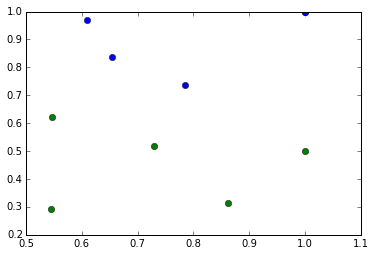

In [319]:
from sklearn.cluster import KMeans
m = KMeans(2)
cluster["cluster"] = m.fit_predict(cluster[[14, 13]].values)
for i in set(cluster["cluster"]):
    c = cluster[cluster["cluster"] == i]
    plt.plot(c[14], c[13], 'o')
#plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()